# Group Proposal 118 - What Causes Heart Disease?
### Steven Son, Yifei Chen, Melissa Wu, Yashita Kapoor









# Introduction:


<img src="https://media.giphy.com/media/26BRv0ThflsHCqDrG/giphy.gif" width = "500"/>

Source: https://media.giphy.com/media/26BRv0ThflsHCqDrG/giphy.gif


**"One person dies every 34 seconds in the United States from cardiovascular disease."**. Heart diseases are one of largest causes of the death in the United States and around the world, but what are indications that someone might be in danger of a heart disease? Heart disease can affect the heart or blood vessels. Many variables such as high blood pressure, and high cholesterol could affect the rate of heart disease. 


**Question:** Using our data and methods we will predict: Which variables are most useful in determining whether or not someone has heart disease, and how accurate is the classification?



The dataset we have chosen is from the UCI Machine Learning Repository, and contains information from Cleveland regarding patient's hearts. 


What each column of the data represents:
* age: age in years
* sex: gender (1 = male; 0 = female)
* chest_pain: chest pain type, Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results, Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
* thalach: maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
* slope: the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat,Value 3: down-sloping
* ca: The number of major vessels (0-3)
* thal: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* num: diagnosis of heart disease (angiographic disease status), Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing



# Data Analysis

### Reading and Wrangling of Dataset.

In [1]:
#Run before continuing
options(repr.matrix.max.rows = 20)
install.packages("naniar")
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr) 
library(gridExtra)
library(RColorBrewer)
options(repr.matrix.max.rows = 8)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

In [2]:
heart_raw <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
heart_raw

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Table 1.0: Raw data**

The dataset was successfully read into R. We made sure to read the data from the original web source, to make sure anyone with the .ipynb file did not require any additional files. The dataset was first opened in notepad to determine if it was comma separated and had no column names. As you can see the data is pretty difficult to understand, so we must tidy it up. 

First and foremost, we have decided to give the columns more readable names. To understand what these columns and their values correspond to, please view our introduction at the beginning of the report.

In [3]:
heart_column <- rename(heart_raw,age = X1,
                   sex = X2,
                   chest_pain = X3,
                   trestbps = X4,
                   chol = X5,
                   fbs = X6,
                   restecg = X7,
                   thalach = X8,
                   exang = X9,
                   oldpeak = X10,
                   slope = X11,
                   ca = X12,
                   thal = X13,
                   num = X14)
heart_column


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Table 1.1: Labelled Raw Data**

Now we get into main tidying of our data. Firstly, we must mutate the last column 'num' which is also the variable we want to classify. 


According to our introduction, column 'num' has values 1 and 0 to determine whether or not this person has a heart disease. Since the original data contains values 1-4, we have
mutate to convert all values > 1 to 1. Then converted the column to a factor. 


Then utilizing the 'naniar' library. We replace all values of '?' with 'NA', and remove all rows that contain NA.

In [4]:
library(naniar)
#A library that allows us to manipulate data regarding 'NA'
heart_tidy <- heart_column %>%

              mutate(num = ifelse(num >= 1, 1, 0), num = as_factor(num)) %>%
                # If larger or equal to 1, set value to 1, 0 otherwise. 
                # Changed num to <fct> for classification later.


              replace_with_na_all(condition = ~.x == '?') %>%
                # From the naniar library, basically replaces all '?' value in all columns with NA.
            
              na.omit() 
                # Removes all rows that contain NA.
              

heart_tidy

age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Table 1.2: Tidy data with NA Removed**




The data is now officially **Tidy**!!

### Exploration of Training data

We will split up our data into training and testing data, to ensure that the accuracy of our model is valid. 

In [5]:
set.seed(1212)

heart_split <- initial_split(heart_tidy, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Table 1.3: Training Data**

In [6]:
heart_test

age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0
54,1,4,140,239,0,0,160,0,1.2,1,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,1
55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,0
63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0,1
63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1


**Table 1.4: Testing Data**

We decided to look at how many of our patients have a heart disease (1) and how many do not (0). As we found it might be helpful for classification later on. 

In [7]:
heart_disease_yes_no <- heart_train %>%
                         group_by(num) %>%
                         summarize(n = n()) 
heart_disease_yes_no

num,n
<fct>,<int>
0,120
1,102


**Table 1.5: Number of patients with or without heart disease in training data**

We also decided to take a look at the mean value of all **numeric** predictors people with heart disease and people without. 
As we believed that from the information we learned in class, that classifaction works best with numeric predictors. Overall, we felt this information would be useful
in determining which predictors would be the best in determining if a person has a heart disease or not. 

In [8]:
heart_mean_1 <- heart_train %>%
              filter(num == 1) %>%
              select(-sex, -chest_pain, -fbs, -restecg, -exang, -slope, -ca, -thal, -num) %>%
              map_df(mean)


heart_mean_1




age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56.33333,134.4314,251.3922,140.951,1.487255


**Table 1.6: Mean value of numeric predictors for people with heart disease**

In [9]:
heart_mean_0 <- heart_train %>%
              filter(num == 0) %>%
              select(-sex, -chest_pain, -fbs, -restecg, -exang, -slope, -ca, -thal, -num) %>%
              map_df(mean)


heart_mean_0

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.50833,128.95,238.5167,159.125,0.6183333


**Table 1.7: Mean value of numeric predictors for people without heart disease**

### Selecting Preditor Variables

In order to select our best preditor varaibles, we have decided to use the numeric predictors to graph the proportion between people with heart disease and without over the values present in the variables. We believed this could be useful in determining which predictors are actually having an effect on heart disease as the value of the variable changes.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



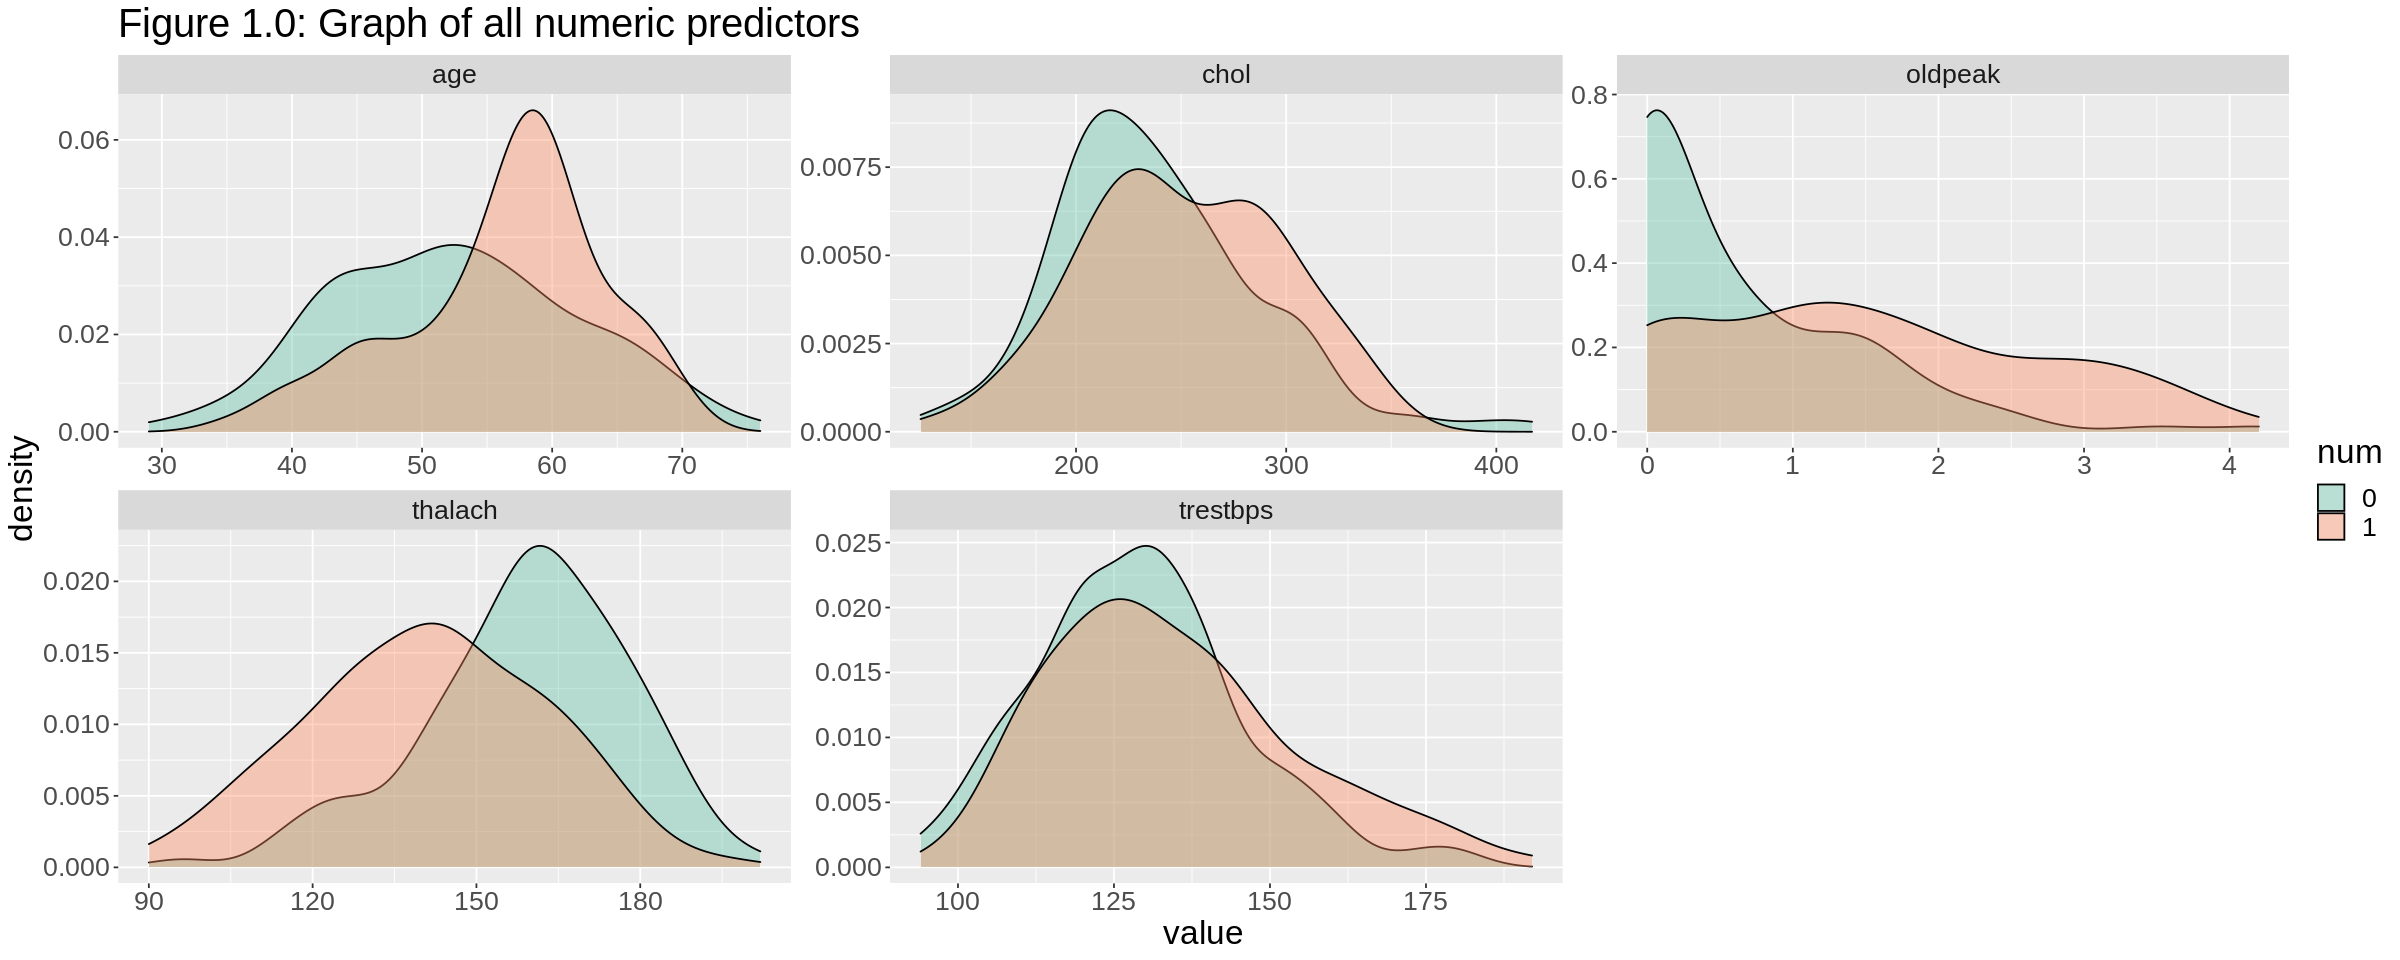

In [10]:
set.seed(1212)

options(repr.plot.height = 8, repr.plot.width = 20)



# We will first select the numeric variables (including num)
numeric_heart <- select(heart_train, age, trestbps, chol, thalach, oldpeak, num)


# We will now create a histogram of all 5 variables utilzing pivot_longer to 
numeric_heart_graph <- numeric_heart %>%
          pivot_longer(cols = - num, names_to = "category", values_to = "value")  %>% 
          ggplot(aes(value, fill = num)) +
          geom_density(alpha = 0.4) +
          facet_wrap(~ category, scales = 'free') +
          theme(text = element_text(size = 20))+
          scale_fill_discrete(name="Heart Disease?" ,labels=c("No", "Yes"))+
          ggtitle("Figure 1.0: Graph of all numeric predictors")

numeric_heart_graph <- numeric_heart_graph +
                     scale_fill_brewer(palette = "Set2") 

numeric_heart_graph

Judging by Figure 1.0, we can carefully determine that age, thalach (maximum heart rate achieved), and oldpeak (ST depression induced by exercise relative to res) are the 3 best variables. As these 3 variables have the most area that are being overlapped. Which would mean that manipulating these variables have the greatest impact on whether or not someone has a heart disease.

### Visualizing The Best Predictors

As we have narrowed down the predictors to age, thalach (maximum heart rate achieved), and oldpeak (ST depression induced by exercise relative to res) through Figure 1.0. We will now visualize the distribution of our predictor variables, utilziing a histogram.

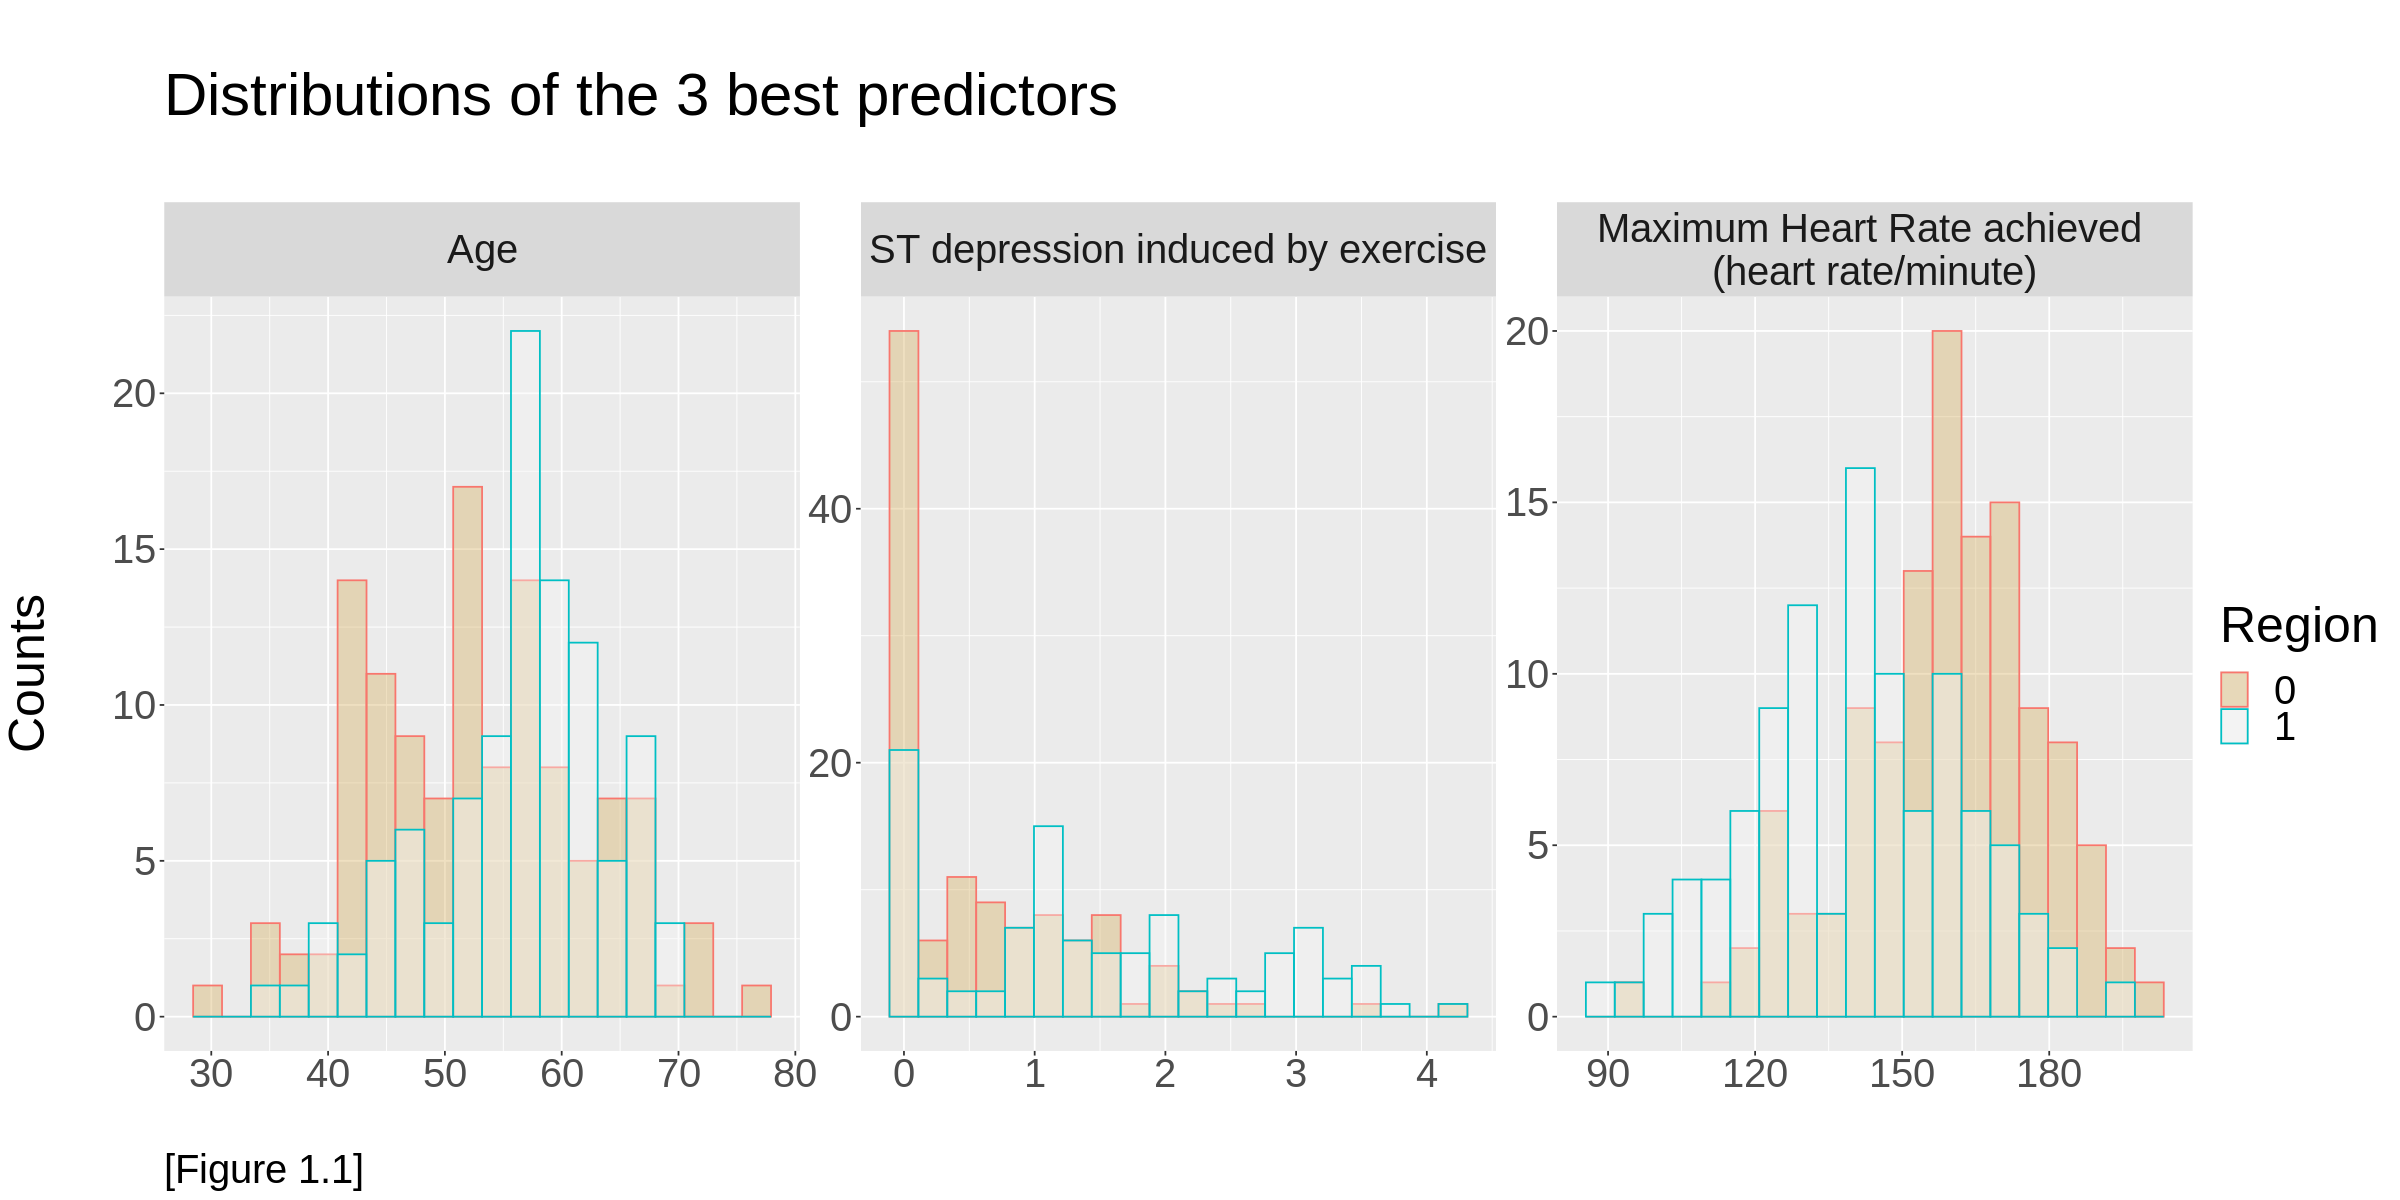

In [11]:
set.seed(1212)


options(repr.plot.width = 20, repr.plot.height = 10)

pivoted_heart <- numeric_heart %>% 
    pivot_longer(cols = -c(num, chol, trestbps),
                 names_to = "predictors",
                 values_to = "values")

labels <- c(age = "Age",
                   oldpeak = "ST depression induced by exercise",
                   thalach = "Maximum Heart Rate achieved \n(heart rate/minute)")

bestpredictor_plot <- pivoted_heart %>%
    ggplot(aes(x = values, fill = num, colour = num)) + 
    geom_histogram(alpha = 0.4, position = 'identity', bins = 20) +
    labs(x = "",
         y = "Counts\n",
         fill = "Region",
         colour = "Region",
         title = "\nDistributions of the 3 best predictors\n",
         caption = "[Figure 1.1]") +
    facet_wrap(vars(predictors), 
               scales = "free",
               labeller = labeller(predictors = labels)) +
    theme(strip.text.y.left = element_text(angle = 0),
          plot.caption = element_text(hjust = 0),
          text = element_text(size = 30)) +
    scale_fill_brewer(palette = "BrBG") # To see more colorblind friendly pallete: display.brewer.all(colorblindFriendly = T)


bestpredictor_plot

By visualizing the best predictors we are able to determine the affect these variables have on whether or not someone has a heart disease. For age, we can see that as age increases there is generally more people with heart disease. As for ST depression (oldpeak) we generally see a steady amount of people with heart disease as the number increases. Finally for maximum heart rate reached, we can see that generally patients who are not able to reach a high heart rate are most likely diagnosed with a heart disease. 

### Data Analysis

#### Tuning the model

In [12]:

set.seed(1212)


heart_recipe <- recipe(num ~ age + thalach + oldpeak, data = heart_train) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
gridvals <- tibble(neighbors = seq(1, 25))

heart_results <- workflow() %>% 
    add_recipe(heart_recipe) %>% 
    add_model(knn_spec) %>% 
    tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
    collect_metrics() %>% 
    filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 7)



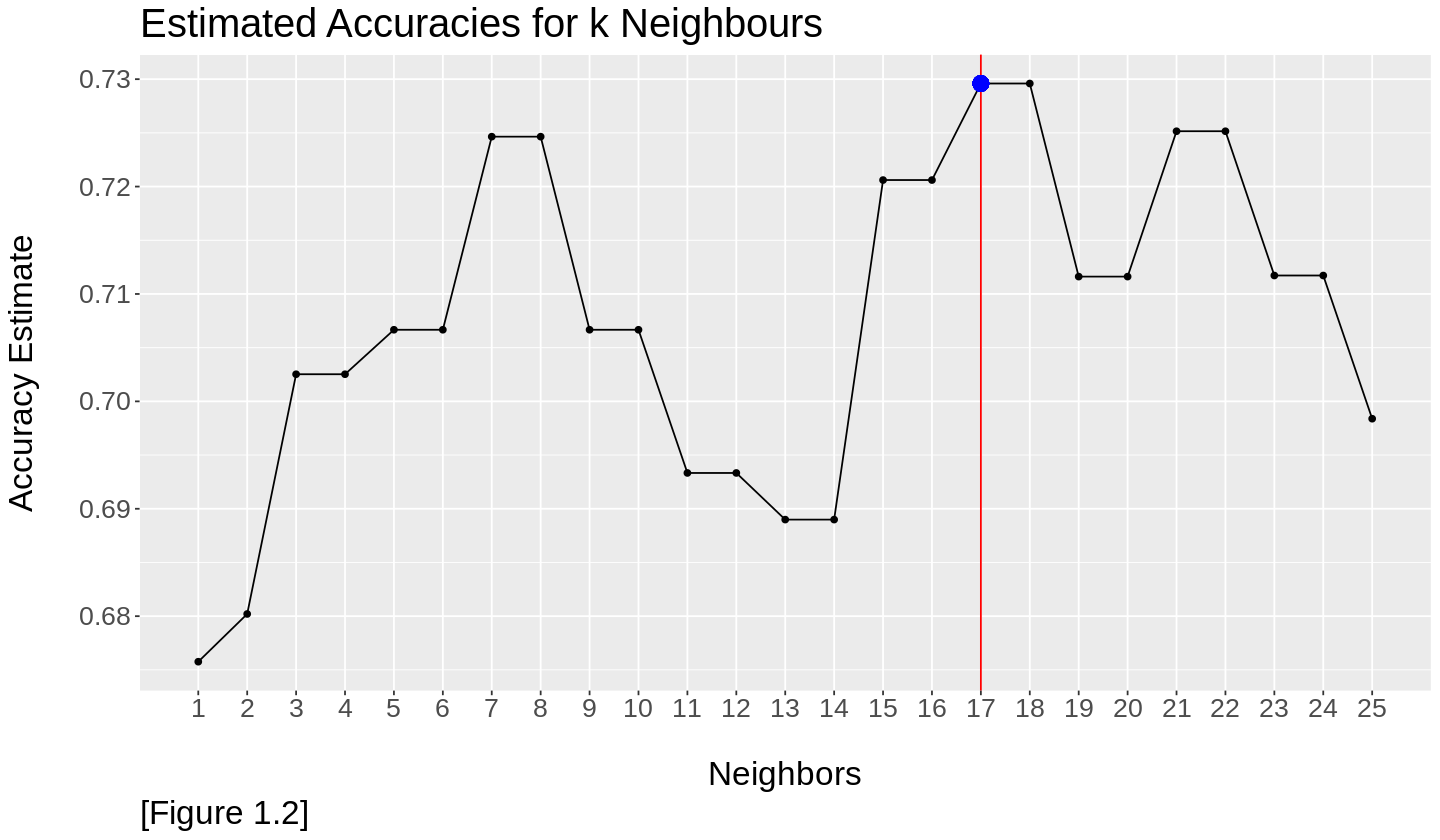

In [13]:
set.seed(1212)

ky <- heart_results %>% filter(neighbors == 17) %>% select(mean) %>% pull()

heart_plot <- heart_results %>% 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 17, colour = "red") +
    geom_point(aes(x=17, y= ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies for k Neighbours",
         caption = "[Figure 1.2]") +
    scale_x_continuous(limits = c(1, 25), breaks = seq(1, 25), minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

heart_plot

Utilizing our 3 best predictors we have built our K-NN classifier through these steps:

1. Creating a recipe that consited of our 3 best variables: age, thalach, and oldpeak.
2. Constructing our k-nn model through the use of neighbors = tune() as we must first tune the model to determine the best value for k.
3. Perform a cross-validation with 5 folds
4. A worklist that encapsulates the recipe and model applying tune_grid() and collect_metrics() to help determine the best k value.
5. Plotting all accuracies with its respective neighbor (Figure 1.2). 

We have decided that the k value of 17 is our best neighbor. First and foremost, the highest accuracy of the model is seen at k=17. Furthermore, while accuracies are just as high when the k value is 7-8 or 21-22, the fact that the accuracy decreases heavily right outside of the range is a good evidence that the k value might be unreliable. Because of this we chose the k value of 17, which maintains a steady accuracy while increasing or decreasing k.

#### K-NN Classifcation

Using our new found k value, it is finally time to test our model on the testing data. 

In [14]:
set.seed(1212)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")


# We can utilize the same recipe, however must update our model to the discovered k value
heart_fit <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(knn_best_spec) %>%
  fit(data = heart_train)

heart_predictions <- predict(heart_fit, heart_test) %>% 
    bind_cols(heart_test)

heart_acc <- heart_predictions %>% 
    metrics(truth = num, estimate = .pred_class) %>% 
    select(.metric, .estimate) %>% 
    head(1)

heart_cm <- heart_predictions %>% 
    conf_mat(truth = num, estimate = .pred_class)

heart_acc
    

.metric,.estimate
<chr>,<dbl>
accuracy,0.7466667


**Table 1.8: Accuracy of our model!**

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



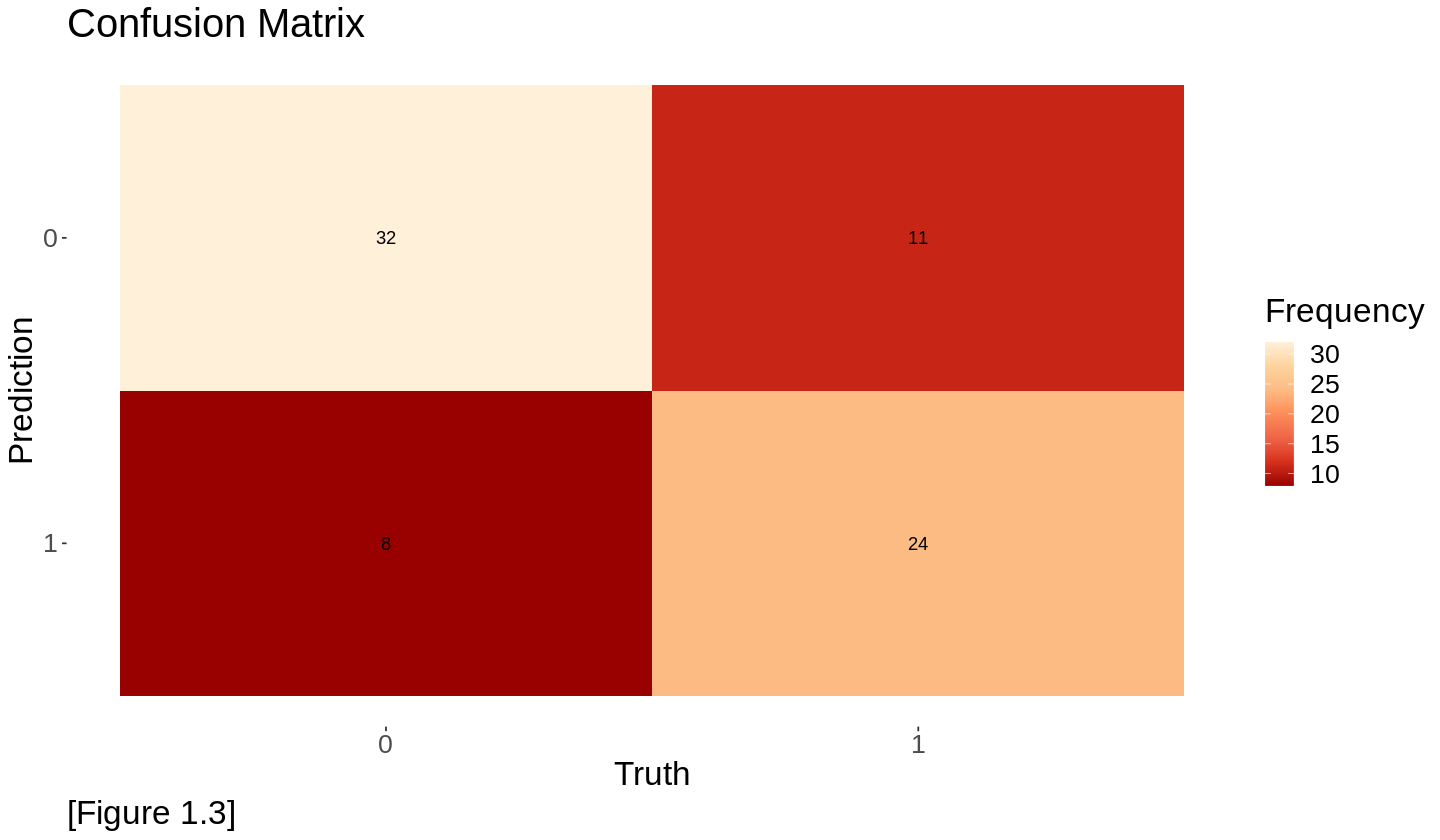

In [15]:
set.seed(1212)

autoplot(heart_cm, type = "heatmap") +
    scale_fill_distiller(palette = "OrRd", name = "Frequency") + 
    labs(title = "Confusion Matrix", caption = "[Figure 1.3]") +
    theme(legend.position = "right", text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

* In conclusion, it is seen in table 1.8 that our k-nn classification model had a accuracy of approximately 74.7%. 
* To visualize this even further, we created a confusion matrix in figure 1.3, where it can be seen that the model generally produced the correct classification.
* Overall, 56/75 of the testing data was classified correctly, giving us the 74.7% accuracy. 

# Discussion:

### Summarization of findings:

### Is this what you expected to find?


### What do you expect to find? (remove)
We expect to find the variables which most accurately determine whether or not a person has heart disease. We want to determine which predictors from the data above are most effective in predicting heart disease in a person. We also want to understand how accurate our classification model is so that we can better it in the future.


### What impact could such findings have? (update)
Such findings will help people who do not have heart disease to be aware of the factors which affect heart diseas and steer clear from it. It would help both doctors and patients be more aware of the factors that would lead to heart disease which can help them in taking precautions and preventing heart disease. These findings can help revolutionize the way we treat heart diseases currently, and make it more efficient, and make people more aware.


### What future questions could this lead to? (update)
Future questions to address would be understanding and determining exactly how much each predictor contributes to the accuracy of predicting heart dieases, as well as the amount each predictor affects susceptibility to heart disease.


**Citations:**
* NCI Dictionary of Cancer Terms. (n.d.). National Cancer Institute. Retrieved October 29, 2022, from https://www.cancer.gov/publications/dictionaries/cancer-terms/def/heart-disease.
* Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 29, 2022, from https://www.cdc.gov/heartdisease/facts.htm 